# Model analysis

In [13]:
import random
import warnings
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [44]:
import sys
sys.path.append("../")

from scripts.model import create_model, train_model, plot_curve

In [3]:
dummy_model = create_model(1e-3)
dummy_model.build((None, 28, 28))
model_from_ckpt = tf.keras.saving.load_model("../checkpoint/")

In [4]:
print("Model from checkpoint")
model_from_ckpt.summary()

print("\nModel from training file")
dummy_model.summary()

Model from checkpoint
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Model from training file
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                

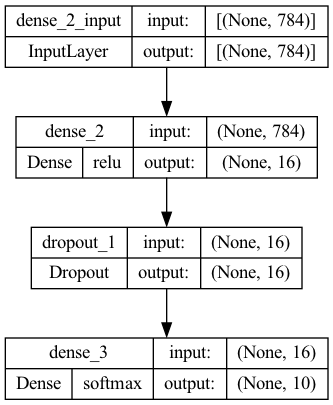

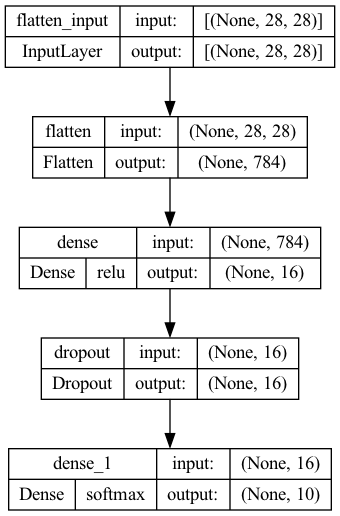

In [5]:
display(tf.keras.utils.plot_model(model_from_ckpt, show_shapes=True, show_layer_activations=True))
display(tf.keras.utils.plot_model(dummy_model, show_shapes=True, show_layer_activations=True))

In [6]:
dummy_input = np.zeros((1, 28, 28))
print(dummy_model.predict(dummy_input))
print(model_from_ckpt.predict(dummy_input.reshape(1, 784)))

1/1 [==============================] - 0s 64ms/step
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
1/1 [==============================] - 0s 26ms/step
[[0.1052354  0.12885886 0.05414566 0.08328817 0.07449424 0.18258691
  0.10668295 0.16862217 0.03097621 0.06510942]]


# Testing

In [7]:
test = pd.read_csv("../data/mnist_test.csv")
x = test.iloc[:, 1:].values / 255.0
y = test.label.values

In [8]:
preds = model_from_ckpt.predict(x)
preds = preds.argmax(1)

313/313 [==============================] - 0s 521us/step


In [9]:
report = classification_report(y, preds)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.94      0.92      0.93      1010
           4       0.94      0.93      0.94       982
           5       0.93      0.91      0.92       892
           6       0.94      0.96      0.95       958
           7       0.94      0.93      0.94      1028
           8       0.92      0.91      0.91       974
           9       0.91      0.93      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



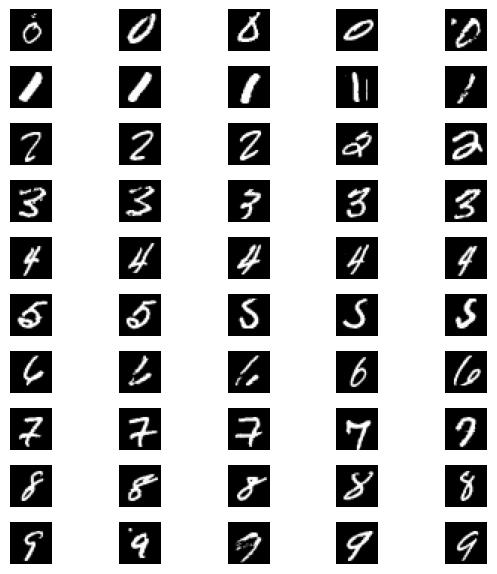

In [43]:
def plot_images(data: list[tuple[np.ndarray, int]], show_labels=False, title="", figsize=(5,2)):
    plt.gray()
    plt.rcParams["figure.figsize"] = figsize
    while len(data) % 5 != 0:
        data.append((np.zeros_like(data[0][0]), ""))

    for i, (x, y) in enumerate(data):
        ax = plt.subplot(len(data) // 5, 5, i+1)
        if show_labels:
            ax.set_title(str(y))
        ax.imshow(x)
        ax.axis('off')
    
    plt.suptitle(title, fontsize=12)
    plt.tight_layout()
    plt.show()

some_bad_imgs = []
labels = []
for label in range(10):
    bad_predicts = test[(test.label != preds) & (test.label == label)].iloc[:, 1:].values.reshape(-1, 28, 28)
    some_bad_imgs.append(bad_predicts[-5:])
    labels.extend([label]*5)

some_bad_imgs = np.concatenate(some_bad_imgs)
plot_images(list(zip(some_bad_imgs, labels)), figsize=(8, 6))

Epoch 1/50
12/12 [==============================] - 0s 14ms/step - loss: 2.2323 - accuracy: 0.2122 - val_loss: 2.0569 - val_accuracy: 0.3395
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 1.9239 - accuracy: 0.3864 - val_loss: 1.7266 - val_accuracy: 0.4981
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1.6283 - accuracy: 0.5259 - val_loss: 1.4223 - val_accuracy: 0.6417
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 1.3816 - accuracy: 0.6050 - val_loss: 1.1726 - val_accuracy: 0.7003
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 1.1810 - accuracy: 0.6569 - val_loss: 0.9802 - val_accuracy: 0.7623
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 1.0367 - accuracy: 0.7082 - val_loss: 0.8365 - val_accuracy: 0.8078
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.9299 - accuracy: 0.7393 - val_loss: 0.7342 - val_accuracy: 0.8328
Epoch 8/50
12/12 [=

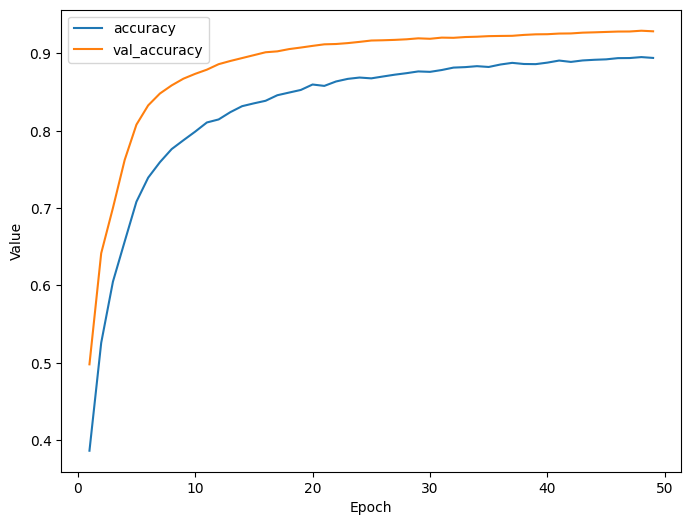

3/3 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.9274


[0.2611958980560303, 0.9273999929428101]

In [52]:
np.set_printoptions(linewidth=200)
train = pd.read_csv("../data/d1.csv")
test = pd.read_csv("../data/mnist_test.csv")

X = train.iloc[:, 1:].values / 255.0
X_test = test.iloc[:, 1:].values / 255.0
y = train["label"].values
y_test = test["label"].values

learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

model = create_model(learning_rate)

epochs, hist = train_model(model, X, y, epochs, batch_size, validation_split)

list_of_metrics_to_plot = ["accuracy", "val_accuracy"]
plot_curve(epochs, hist, list_of_metrics_to_plot)

model.evaluate(x=X_test, y=y_test, batch_size=batch_size)

# Выводы

1. Архитектура модели в файле обучения не соответствует той, которая предоставленна в виде чекпоинта в папке 'v1/'
2. Нет фиксации seed во время обучения
3. Нет сохранения результатов валидации, что затрудняет оценку модели, при передаче ее другим разработчикам


Модель чекпоинта состоит из 3 слоев: 2 линейных слоя между которыми стоит dropout слой. Также после 1 линейного слоя применяется активация ReLU, для того, чтобы внести нелинейность в модель. После второго линейного слоя применяется активация Softmax приводящая выходы модели к виду где i-й элемент результирующего массива является вероятностью того, что i-й класс является ответом. 
На вход модель принимает изображение приведенное к формату (batch_size, 28x28). На выход выдает массив размера (batch_size, num_classes), так как для обучения используется датасет MNIST, то num_classes = 10 -- кол-во цифр. 

Dense реализует операцию: output = activation(dot(input, kernel) + bias), где активация — это функция активации по элементам, переданная в качестве аргумента активации, кернел — это матрица весов, созданная слоем, а смещение — это вектор смещения, созданный слоем (применимо только в случае, если use_bias — True).

Слой Dropout состоит в случайной установке доли единиц ввода в 0 при каждом обновлении во время обучения, что помогает предотвратить переобучение (оверфиттинг). В даннос случае значение rate=0.1



